# Основы PyTorch: эксперименты с примитивами

В этом ноутбуке мы поэкспериментируем с основными компонентами PyTorch и увидим как они работают в разных режимах


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt


## 1. Тензоры (Tensors)

Тензор - основная структура данных в PyTorch, аналог numpy array, но с поддержкой GPU и автоматического дифференцирования


### Создание тензоров разными способами


In [ ]:
x1 = torch.tensor([1, 2, 3, 4, 5])
x2 = torch.zeros(3, 4)
x3 = torch.ones(2, 3)
x4 = torch.randn(2, 3)
x5 = torch.arange(0, 10, 2)
x6 = torch.linspace(0, 1, 5)

print("Из списка:", x1)
print("\nНули:", x2)
print("\nЕдиницы:", x3)
print("\nСлучайные (нормальное распределение):", x4)
print("\nПоследовательность:", x5)
print("\nЛинейное пространство:", x6)


Из списка: tensor([1, 2, 3, 4, 5])

Нули: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Единицы: tensor([[1., 1., 1.],
        [1., 1., 1.]])

Случайные (нормальное распределение): tensor([[-0.3358, -1.6168, -0.7267],
        [-0.3185,  0.3650,  0.1392]])

Последовательность: tensor([0, 2, 4, 6, 8])

Линейное пространство: tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


### Типы данных (dtype)


In [3]:
float32_tensor = torch.tensor([1.0, 2.0], dtype=torch.float32)
float64_tensor = torch.tensor([1.0, 2.0], dtype=torch.float64)
int_tensor = torch.tensor([1, 2], dtype=torch.int32)
long_tensor = torch.tensor([1, 2], dtype=torch.long)
bool_tensor = torch.tensor([True, False], dtype=torch.bool)

print(f"float32: {float32_tensor}, dtype={float32_tensor.dtype}, размер={float32_tensor.element_size()} байт")
print(f"float64: {float64_tensor}, dtype={float64_tensor.dtype}, размер={float64_tensor.element_size()} байт")
print(f"int32: {int_tensor}, dtype={int_tensor.dtype}")
print(f"int64/long: {long_tensor}, dtype={long_tensor.dtype}")
print(f"bool: {bool_tensor}, dtype={bool_tensor.dtype}")

converted = int_tensor.float()
print(f"\nКонвертация int -> float: {converted}, dtype={converted.dtype}")


float32: tensor([1., 2.]), dtype=torch.float32, размер=4 байт
float64: tensor([1., 2.], dtype=torch.float64), dtype=torch.float64, размер=8 байт
int32: tensor([1, 2], dtype=torch.int32), dtype=torch.int32
int64/long: tensor([1, 2]), dtype=torch.int64
bool: tensor([ True, False]), dtype=torch.bool

Конвертация int -> float: tensor([1., 2.]), dtype=torch.float32


### Устройства (Device): CPU vs GPU


In [4]:
cpu_tensor = torch.tensor([1.0, 2.0, 3.0])
print(f"CPU тензор: device={cpu_tensor.device}")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Доступное устройство: {device}")

gpu_tensor = cpu_tensor.to(device)
print(f"GPU тензор: device={gpu_tensor.device}")

back_to_cpu = gpu_tensor.cpu()
print(f"Обратно на CPU: device={back_to_cpu.device}")

direct_gpu = torch.randn(3, 3, device=device)
print(f"\nСоздание сразу на устройстве: device={direct_gpu.device}")


CPU тензор: device=cpu
Доступное устройство: cpu
GPU тензор: device=cpu
Обратно на CPU: device=cpu

Создание сразу на устройстве: device=cpu


## 2. Autograd: автоматическое дифференцирование

Autograd - система автоматического вычисления градиентов, основа обучения нейросетей


### Базовый пример: вычисление градиента


In [19]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2 + 3 * x + 1
print(f"x = {x.item()}")
print(f"y = x^2 + 3x + 1 = {y.item()}")
print(f"requires_grad: x={x.requires_grad}, y={y.requires_grad}")

y.backward()
print(f"\nГрадиент dy/dx = 2x + 3 = {x.grad.item()}")


x = 2.0
y = x^2 + 3x + 1 = 11.0
requires_grad: x=True, y=True

Градиент dy/dx = 2x + 3 = 7.0


### Градиенты для векторов и матриц


In [6]:
w = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
x = torch.tensor([2.0, 1.0, 0.5])
z = torch.dot(w, x)
print(f"w = {w}")
print(f"x = {x}")
print(f"z = w·x = {z.item()}")

z.backward()
print(f"\nГрадиент dz/dw = x = {w.grad}")

w.grad.zero_()
loss = (w ** 2).sum()
loss.backward()
print(f"\nДругой пример: loss = sum(w^2) = {loss.item()}")
print(f"Градиент dloss/dw = 2w = {w.grad}")


w = tensor([1., 2., 3.], requires_grad=True)
x = tensor([2.0000, 1.0000, 0.5000])
z = w·x = 5.5

Градиент dz/dw = x = tensor([2.0000, 1.0000, 0.5000])

Другой пример: loss = sum(w^2) = 14.0
Градиент dloss/dw = 2w = tensor([2., 4., 6.])


### Накопление градиентов: что будет если вызвать backward() несколько раз


In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

y1 = (x ** 2).sum()
print(f"y1 = sum(x^2) = {y1.item()}")
print(f"Градиент до backward: {x.grad}")

y1.backward()
print(f"Градиент после 1-го backward: {x.grad}")
print(f"Ожидаемый градиент dy1/dx = 2x = {2*x.detach()}")

print("\n=== Вызываем backward() второй раз без обнуления ===")
y2 = (x ** 3).sum()
print(f"y2 = sum(x^3) = {y2.item()}")
y2.backward()
print(f"Градиент после 2-го backward (накопился!): {x.grad}")
print(f"Это сумма: dy1/dx + dy2/dx = 2x + 3x^2 = {2*x.detach() + 3*x.detach()**2}")

print("\n=== Правильный способ: обнуляем градиент перед вторым backward ===")
x.grad.zero_()
print(f"Градиент после обнуления: {x.grad}")

y2.backward()
print(f"Градиент после backward с обнулением: {x.grad}")
print(f"Ожидаемый градиент dy2/dx = 3x^2 = {3*x.detach()**2}")


### torch.no_grad(): отключение градиентов


In [7]:
a = torch.tensor([1.0, 2.0], requires_grad=True)

b = a * 2
print(f"С градиентами: b.requires_grad = {b.requires_grad}")

with torch.no_grad():
    c = a * 2
    print(f"Без градиентов: c.requires_grad = {c.requires_grad}")

d = a.detach() * 2
print(f"После detach: d.requires_grad = {d.requires_grad}")


С градиентами: b.requires_grad = True
Без градиентов: c.requires_grad = False
После detach: d.requires_grad = False


## 3. Dataset и DataLoader

Механизм загрузки и батчирования данных в PyTorch


### Создание своего Dataset


In [8]:
class SimpleDataset(Dataset):
    def __init__(self, size=100):
        self.X = torch.randn(size, 5)
        self.y = torch.randint(0, 2, (size,))
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = SimpleDataset(size=20)
print(f"Размер датасета: {len(dataset)}")
print(f"\nПервый пример:")
x, y = dataset[0]
print(f"  X shape: {x.shape}, y: {y}")


Размер датасета: 20

Первый пример:
  X shape: torch.Size([5]), y: 1


### DataLoader: разные режимы работы


In [9]:
dataset = SimpleDataset(size=10)

print("=== Без shuffle, batch_size=3 ===")
loader1 = DataLoader(dataset, batch_size=3, shuffle=False)
for i, (X_batch, y_batch) in enumerate(loader1):
    print(f"Batch {i}: X shape={X_batch.shape}, y={y_batch.tolist()}")

print("\n=== С shuffle, batch_size=3 ===")
loader2 = DataLoader(dataset, batch_size=3, shuffle=True)
for i, (X_batch, y_batch) in enumerate(loader2):
    print(f"Batch {i}: X shape={X_batch.shape}, y={y_batch.tolist()}")

print("\n=== drop_last=True (отбрасывает неполный батч) ===")
loader3 = DataLoader(dataset, batch_size=3, drop_last=True)
print(f"Количество батчей с drop_last=True: {len(loader3)}")

print("\n=== drop_last=False (по умолчанию) ===")
loader4 = DataLoader(dataset, batch_size=3, drop_last=False)
print(f"Количество батчей с drop_last=False: {len(loader4)}")


=== Без shuffle, batch_size=3 ===
Batch 0: X shape=torch.Size([3, 5]), y=[1, 1, 1]
Batch 1: X shape=torch.Size([3, 5]), y=[0, 0, 0]
Batch 2: X shape=torch.Size([3, 5]), y=[1, 1, 1]
Batch 3: X shape=torch.Size([1, 5]), y=[0]

=== С shuffle, batch_size=3 ===
Batch 0: X shape=torch.Size([3, 5]), y=[1, 1, 1]
Batch 1: X shape=torch.Size([3, 5]), y=[1, 0, 1]
Batch 2: X shape=torch.Size([3, 5]), y=[0, 0, 0]
Batch 3: X shape=torch.Size([1, 5]), y=[1]

=== drop_last=True (отбрасывает неполный батч) ===
Количество батчей с drop_last=True: 3

=== drop_last=False (по умолчанию) ===
Количество батчей с drop_last=False: 4


## 4. torch.nn: слои и модули

Готовые блоки для построения нейронных сетей


### Основные слои


In [10]:
linear = nn.Linear(in_features=5, out_features=3)
x = torch.randn(2, 5)
output = linear(x)
print(f"Linear: input {x.shape} -> output {output.shape}")
print(f"Веса: {linear.weight.shape}, Bias: {linear.bias.shape}")

conv = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
x_img = torch.randn(1, 3, 28, 28)
output = conv(x_img)
print(f"\nConv2d: input {x_img.shape} -> output {output.shape}")

dropout = nn.Dropout(p=0.5)
x = torch.ones(3, 4)
print(f"\nБез Dropout:\n{x}")
dropout.train()
print(f"С Dropout (train mode, p=0.5):\n{dropout(x)}")
dropout.eval()
print(f"С Dropout (eval mode):\n{dropout(x)}")


Linear: input torch.Size([2, 5]) -> output torch.Size([2, 3])
Веса: torch.Size([3, 5]), Bias: torch.Size([3])

Conv2d: input torch.Size([1, 3, 28, 28]) -> output torch.Size([1, 16, 28, 28])

Без Dropout:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
С Dropout (train mode, p=0.5):
tensor([[2., 0., 0., 2.],
        [0., 0., 2., 0.],
        [0., 0., 0., 2.]])
С Dropout (eval mode):
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


### Функции активации


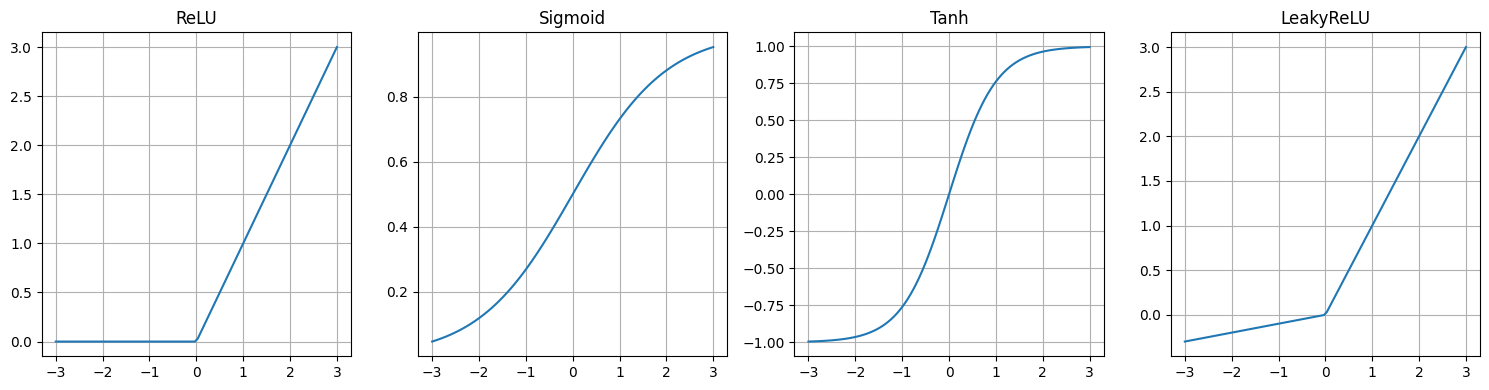

In [11]:
x = torch.linspace(-3, 3, 100)

relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
leaky_relu = nn.LeakyReLU(negative_slope=0.1)

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.plot(x.numpy(), relu(x).numpy())
plt.title('ReLU')
plt.grid(True)

plt.subplot(1, 4, 2)
plt.plot(x.numpy(), sigmoid(x).numpy())
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(1, 4, 3)
plt.plot(x.numpy(), tanh(x).numpy())
plt.title('Tanh')
plt.grid(True)

plt.subplot(1, 4, 4)
plt.plot(x.numpy(), leaky_relu(x).numpy())
plt.title('LeakyReLU')
plt.grid(True)

plt.tight_layout()
plt.show()


### Создание моделей: разные подходы


In [12]:
model1 = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 2)
)
print("=== Sequential ===")
print(model1)

class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model2 = CustomModel(10, 20, 2)
print("\n=== Custom Module ===")
print(model2)

x = torch.randn(5, 10)
print(f"\nВход: {x.shape}")
print(f"Выход model1: {model1(x).shape}")
print(f"Выход model2: {model2(x).shape}")


=== Sequential ===
Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=2, bias=True)
)

=== Custom Module ===
CustomModel(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)

Вход: torch.Size([5, 10])
Выход model1: torch.Size([5, 2])
Выход model2: torch.Size([5, 2])


### Функции потерь (Loss Functions)


In [13]:
predictions = torch.randn(3, 5)
targets_class = torch.tensor([1, 0, 4])
targets_values = torch.randn(3, 5)

ce_loss = nn.CrossEntropyLoss()
loss_ce = ce_loss(predictions, targets_class)
print(f"CrossEntropyLoss (для классификации): {loss_ce.item():.4f}")

mse_loss = nn.MSELoss()
loss_mse = mse_loss(predictions, targets_values)
print(f"MSELoss (для регрессии): {loss_mse.item():.4f}")

mae_loss = nn.L1Loss()
loss_mae = mae_loss(predictions, targets_values)
print(f"L1Loss/MAE (для регрессии): {loss_mae.item():.4f}")

print("\n=== Reduction modes ===")
mse_none = nn.MSELoss(reduction='none')
mse_mean = nn.MSELoss(reduction='mean')
mse_sum = nn.MSELoss(reduction='sum')

pred = torch.tensor([1.0, 2.0, 3.0])
target = torch.tensor([1.5, 2.5, 2.0])

print(f"none (поэлементно): {mse_none(pred, target)}")
print(f"mean (среднее): {mse_mean(pred, target).item():.4f}")
print(f"sum (сумма): {mse_sum(pred, target).item():.4f}")


CrossEntropyLoss (для классификации): 1.7396
MSELoss (для регрессии): 2.3544
L1Loss/MAE (для регрессии): 1.0353

=== Reduction modes ===
none (поэлементно): tensor([0.2500, 0.2500, 1.0000])
mean (среднее): 0.5000
sum (сумма): 1.5000


## 5. Оптимизаторы (Optimizers)

Разные алгоритмы оптимизации для обновления весов


### Разные оптимизаторы и их параметры


In [14]:
model = nn.Linear(10, 2)

sgd = optim.SGD(model.parameters(), lr=0.01)
print(f"SGD: {sgd}")

sgd_momentum = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print(f"\nSGD с momentum: {sgd_momentum}")

adam = optim.Adam(model.parameters(), lr=0.001)
print(f"\nAdam: {adam}")

adamw = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
print(f"\nAdamW (с weight decay): {adamw}")

rmsprop = optim.RMSprop(model.parameters(), lr=0.01)
print(f"\nRMSprop: {rmsprop}")


SGD: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

SGD с momentum: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

Adam: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

AdamW (с weight decay): AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

RMSprop: RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01


### Сравнение оптимизаторов на простой задаче


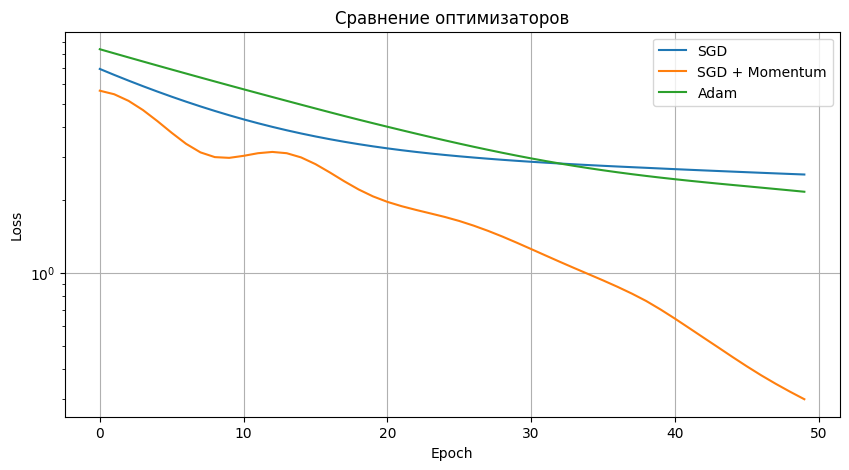

In [15]:
def train_with_optimizer(optimizer_class, lr, name, epochs=50):
    model = nn.Sequential(nn.Linear(2, 10), nn.ReLU(), nn.Linear(10, 1))
    optimizer = optimizer_class(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    
    X = torch.randn(100, 2)
    y = (X[:, 0] ** 2 + X[:, 1] ** 2).unsqueeze(1)
    
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X)
        loss = criterion(predictions, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses

sgd_losses = train_with_optimizer(optim.SGD, lr=0.01, name='SGD')
sgd_momentum_losses = train_with_optimizer(lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9), lr=0.01, name='SGD+Momentum')
adam_losses = train_with_optimizer(optim.Adam, lr=0.01, name='Adam')

plt.figure(figsize=(10, 5))
plt.plot(sgd_losses, label='SGD')
plt.plot(sgd_momentum_losses, label='SGD + Momentum')
plt.plot(adam_losses, label='Adam')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Сравнение оптимизаторов')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


### Влияние Learning Rate


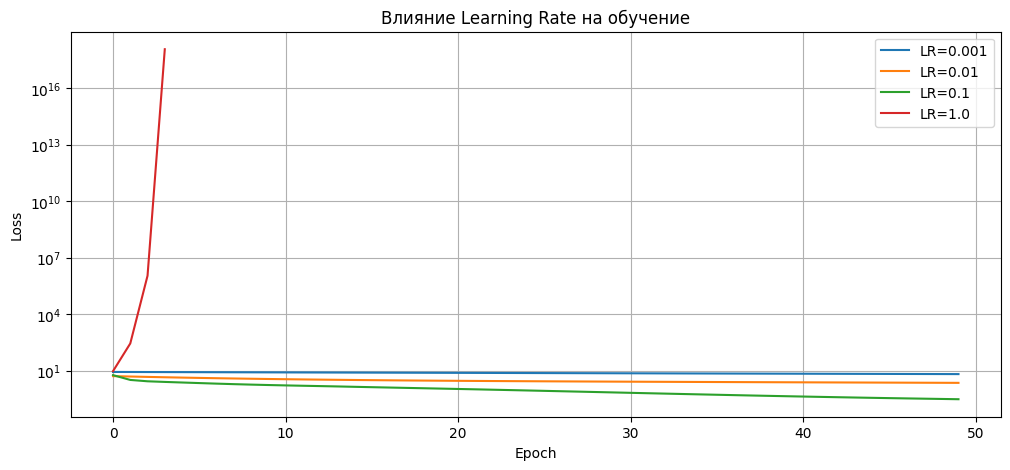

In [16]:
learning_rates = [0.001, 0.01, 0.1, 1.0]

plt.figure(figsize=(12, 5))
for lr in learning_rates:
    losses = train_with_optimizer(optim.SGD, lr=lr, name=f'LR={lr}', epochs=50)
    plt.plot(losses, label=f'LR={lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Влияние Learning Rate на обучение')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


## 6. Режимы train() и eval()

Некоторые слои ведут себя по-разному в режимах обучения и инференса


In [17]:
class ModelWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
    
    def forward(self, x):
        x = self.fc(x)
        x = self.dropout(x)
        return x

model = ModelWithDropout()
x = torch.ones(3, 10)

print("=== Train mode ===")
model.train()
print("Первый проход:")
print(model(x)[0, :5])
print("Второй проход (разные значения из-за dropout):")
print(model(x)[0, :5])

print("\n=== Eval mode ===")
model.eval()
print("Первый проход:")
print(model(x)[0, :5])
print("Второй проход (одинаковые значения, dropout отключен):")
print(model(x)[0, :5])


=== Train mode ===
Первый проход:
tensor([ 0.0000, -2.0717,  0.5195,  1.1260,  0.9017], grad_fn=<SliceBackward0>)
Второй проход (разные значения из-за dropout):
tensor([ 0.8299, -2.0717,  0.0000,  0.0000,  0.0000], grad_fn=<SliceBackward0>)

=== Eval mode ===
Первый проход:
tensor([ 0.4149, -1.0359,  0.2598,  0.5630,  0.4508], grad_fn=<SliceBackward0>)
Второй проход (одинаковые значения, dropout отключен):
tensor([ 0.4149, -1.0359,  0.2598,  0.5630,  0.4508], grad_fn=<SliceBackward0>)


## 7. Полный пример: собираем все вместе

Минимальный пример обучения нейросети от начала до конца


Epoch [5/20], Loss: 0.2226, Test Acc: 0.9450
Epoch [10/20], Loss: 0.0894, Test Acc: 0.9550
Epoch [15/20], Loss: 0.0643, Test Acc: 0.9550
Epoch [20/20], Loss: 0.0392, Test Acc: 0.9600


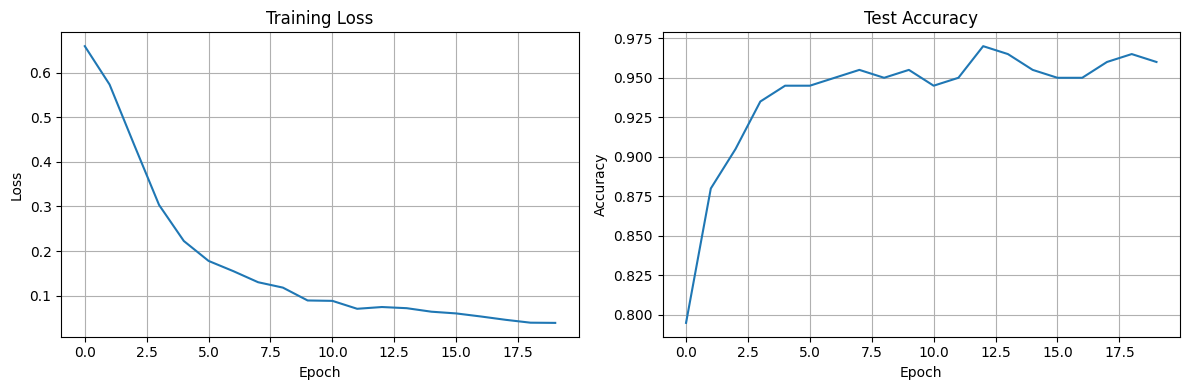

In [18]:
torch.manual_seed(42)

class ToyDataset(Dataset):
    def __init__(self, n_samples=1000):
        self.X = torch.randn(n_samples, 20)
        self.y = (self.X[:, 0] + self.X[:, 1] > 0).long()
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ToyDataset(800)
test_dataset = ToyDataset(200)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = nn.Sequential(
    nn.Linear(20, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
train_losses = []
test_accs = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    train_losses.append(epoch_loss / len(train_loader))
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()
    
    test_acc = correct / total
    test_accs.append(test_acc)
    
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.4f}, Test Acc: {test_acc:.4f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(test_accs)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()
